<a href="https://colab.research.google.com/github/seo-jeong-bang/mini_project/blob/main/%EB%B0%98%EB%A0%A4%EA%B2%AC_%EA%B1%B4%EA%B0%95%EC%A0%95%EB%B3%B4_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.max_columns = None

##데이터 부족한 컬럼 가공

In [ ]:
df = pd.read_excel('/content/combined_dataframe_a_b.xlsx')

In [ ]:
df2 = pd.read_csv('/content/4미만.csv')

In [ ]:
concatenated_df = pd.concat([df, df2])

In [ ]:
concatenated_df

In [ ]:
csv_file_path = '반려견건강정보.csv'  # 저장할 파일명
concatenated_df.to_csv(csv_file_path, index = False)

##데이터불러오기

In [ ]:
df = pd.read_csv('/content/반려견건강정보.csv')

## 데이터 전처리

*   불필요한 피처 제거
*   피처 조합



In [ ]:
df

,metadata.type,metadata.id.species,metadata.id.mission-id,metadata.id.provider-code,metadata.id.breed,metadata.id.age,metadata.id.class,metadata.id.sex,metadata.id.group,metadata.physical.weight,metadata.physical.shoulder-height,metadata.physical.neck-size,metadata.physical.back-length,metadata.physical.chest-size,metadata.physical.BCS,metadata.image.body-part,metadata.breeding.exercise,metadata.breeding.food-count,metadata.breeding.environment,metadata.breeding.defecation,metadata.breeding.food-amount,metadata.breeding.snack-amount,metadata.breeding.food-kind,annotations.image-id,annotations.label.label,annotations.label.points,annotations.label.shape,annotations.label.part,metadata.medical.CRP,metadata.medical.lgG,metadata.medical.IL-6,metadata.medical.AFP,metadata.medical.disease,metadata.vital.stress,metadata.medical.diseaseName
0,A,10,10_105429,112,BIC,4.0,LH,IF,SL,3.0,18.0,24.0,24.0,36.0,4,1,3,4,1,1,1.0,20.0,1,A_10_BIC_IF_20230222_10_105429_01.jpg,전신,"[[533, 270], [2448, 3443]]",Bounding Box,전면,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,10,10_101686,84,BIC,4.0,LH,IM,ML,6.0,30.0,27.0,40.0,39.0,5,16,2,4,1,1,0.5,0.0,1,A_10_BIC_IM_20221212_10_101686_16.jpg,두상,"[[4, 109], [2658, 2363]]",Bounding Box,두상전면우45도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,10,10_101554,47,HUS,5.0,SH,IF,LS,32.0,64.0,38.0,48.0,59.0,5,3,1,2,1,1,2.5,1.0,1,A_10_HUS_IF_20221207_10_101554_03.jpg,전신,"[[241, 100], [1151, 944]]",Bounding Box,좌측면중앙,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,10,10_101539,47,JIN,2.0,SH,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,1,2,1,1,1.0,1.0,1,A_10_JIN_IF_20221207_10_101539_01.jpg,전신,"[[568, 607], [1887, 3643]]",Bounding Box,전면,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,10,10_000697,78,DRI,2.0,LH,IM,SL,3.2,22.0,26.0,30.0,29.0,5,18,3,2,1,1,1.0,0.0,1,A_10_DRI_IM_20221106_10_000697_18.jpg,두상,"[[644, 245], [2892, 1996]]",Bounding Box,두상전면하45도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14355,A,10,10_105449,112,POO,12.0,SH,IF,SS,3.0,26.0,16.5,21.0,30.5,3,13,3,4,1,1,1.0,20.0,1,A_10_POO_IF_20230222_10_105449_13.jpg,전신,"[[1070, 444], [2533, 3562]]",Bounding Box,상측면,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14356,A,10,10_000840,12,MAL,11.0,LH,CM,SL,3.7,21.5,23.0,24.0,35.0,3,8,3,2,1,1,0.6,20.0,2,A_10_MAL_CM_20221111_10_000840_08.jpg,전신,"[[132, 5], [3994, 2570]]",Bounding Box,우측면중앙,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14357,A,10,10_105109,112,POM,2.0,LH,IF,SL,0.8,19.0,24.5,25.0,35.0,3,18,3,2,1,1,1.0,0.0,1,A_10_POM_IF_20230130_10_105109_18.jpg,두상,"[[1028, 284], [3306, 1947]]",Bounding Box,두상전면하45도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14358,A,10,10_000387,1,POO,5.0,SH,IM,SS,4.0,29.0,24.0,35.0,22.0,3,1,3,2,1,1,0.8,1.0,1,A_10_POO_IM_20221028_10_000387_01.jpg,전신,"[[1006, 310], [2569, 2991]]",Bounding Box,전면,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df.columns[4:23]]
df

# metadata.type, metadata.id.species, metadata.id.mission-id, metadata.id.provider-code 제거
# annotations.image-id, annotations.label.label 이후 컬럼들 제거

,metadata.id.breed,metadata.id.age,metadata.id.class,metadata.id.sex,metadata.id.group,metadata.physical.weight,metadata.physical.shoulder-height,metadata.physical.neck-size,metadata.physical.back-length,metadata.physical.chest-size,metadata.physical.BCS,metadata.image.body-part,metadata.breeding.exercise,metadata.breeding.food-count,metadata.breeding.environment,metadata.breeding.defecation,metadata.breeding.food-amount,metadata.breeding.snack-amount,metadata.breeding.food-kind
0,BIC,4.0,LH,IF,SL,3.0,18.0,24.0,24.0,36.0,4,1,3,4,1,1,1.0,20.0,1
1,BIC,4.0,LH,IM,ML,6.0,30.0,27.0,40.0,39.0,5,16,2,4,1,1,0.5,0.0,1
2,HUS,5.0,SH,IF,LS,32.0,64.0,38.0,48.0,59.0,5,3,1,2,1,1,2.5,1.0,1
3,JIN,2.0,SH,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,1,2,1,1,1.0,1.0,1
4,DRI,2.0,LH,IM,SL,3.2,22.0,26.0,30.0,29.0,5,18,3,2,1,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14355,POO,12.0,SH,IF,SS,3.0,26.0,16.5,21.0,30.5,3,13,3,4,1,1,1.0,20.0,1
14356,MAL,11.0,LH,CM,SL,3.7,21.5,23.0,24.0,35.0,3,8,3,2,1,1,0.6,20.0,2
14357,POM,2.0,LH,IF,SL,0.8,19.0,24.5,25.0,35.0,3,18,3,2,1,1,1.0,0.0,1
14358,POO,5.0,SH,IM,SS,4.0,29.0,24.0,35.0,22.0,3,1,3,2,1,1,0.8,1.0,1


In [ ]:
df.columns = df.columns.str.rsplit('.', 1).str[1]

# 컬럼명 변경 : 두번째 .을 기준으로 오른쪽 단어만 남김

<ipython-input-40-13fe56d92545>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df.columns = df.columns.str.rsplit('.', 1).str[1]


또 제거할 피처가 있는지 확인하기

In [ ]:
df.head()

,breed,age,class,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,body-part,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind
0,BIC,4.0,LH,IF,SL,3.0,18.0,24.0,24.0,36.0,4,1,3,4,1,1,1.0,20.0,1
1,BIC,4.0,LH,IM,ML,6.0,30.0,27.0,40.0,39.0,5,16,2,4,1,1,0.5,0.0,1
2,HUS,5.0,SH,IF,LS,32.0,64.0,38.0,48.0,59.0,5,3,1,2,1,1,2.5,1.0,1
3,JIN,2.0,SH,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,1,2,1,1,1.0,1.0,1
4,DRI,2.0,LH,IM,SL,3.2,22.0,26.0,30.0,29.0,5,18,3,2,1,1,1.0,0.0,1


*   'group' 의 앞의 SML은 소형견, 중형견, 대형견을 의미하고 뒤의 SL은 털 길이를 의미


---
따라서 'class'와 중복되므로 'class' 제거 가능


*   'body-part'는 이미지 데이터에서 사진 찍은 부위를 의미

---
현재 이미지 데이터를 학습하지 않으니 제거 가능




In [ ]:
df = df.drop(['class', 'body-part'], axis = 1)
df

# 'class', 'body-part' 피처를 제거

,breed,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind
0,BIC,4.0,IF,SL,3.0,18.0,24.0,24.0,36.0,4,3,4,1,1,1.0,20.0,1
1,BIC,4.0,IM,ML,6.0,30.0,27.0,40.0,39.0,5,2,4,1,1,0.5,0.0,1
2,HUS,5.0,IF,LS,32.0,64.0,38.0,48.0,59.0,5,1,2,1,1,2.5,1.0,1
3,JIN,2.0,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,2,1,1,1.0,1.0,1
4,DRI,2.0,IM,SL,3.2,22.0,26.0,30.0,29.0,5,3,2,1,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14355,POO,12.0,IF,SS,3.0,26.0,16.5,21.0,30.5,3,3,4,1,1,1.0,20.0,1
14356,MAL,11.0,CM,SL,3.7,21.5,23.0,24.0,35.0,3,3,2,1,1,0.6,20.0,2
14357,POM,2.0,IF,SL,0.8,19.0,24.5,25.0,35.0,3,3,2,1,1,1.0,0.0,1
14358,POO,5.0,IM,SS,4.0,29.0,24.0,35.0,22.0,3,3,2,1,1,0.8,1.0,1


In [ ]:
df[df['food-count'] == 4]

# food-count는 1,2,3은 횟수이고 4는 자율급식을 의미한다. 자율급식은 한번에 밥을 많이 주고 알아서 먹는 방법이라고 판단하였고,
# food-count와 food-amount를 곱하여 하루 식사량 피처를 생성하기 위하여 자율급식의 횟수를 1로 바꾼 후 자율급식인지 아닌지를 구분하는 bool 피처를 추가하기로 하였다.

,breed,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind
0,BIC,4.0,IF,SL,3.0,18.0,24.0,24.0,36.0,4,3,4,1,1,1.0,20.0,1
1,BIC,4.0,IM,ML,6.0,30.0,27.0,40.0,39.0,5,2,4,1,1,0.5,0.0,1
5,BIC,0.3,IF,SL,1.0,15.0,15.0,22.0,24.0,5,2,4,1,1,0.5,0.0,1
6,BIC,2.0,IF,SL,3.0,25.0,22.0,37.0,39.0,5,2,4,1,1,1.0,0.0,1
10,BIC,5.0,IF,ML,5.2,31.3,27.1,35.8,34.7,5,3,4,1,1,1.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,POM,9.0,SF,SL,4.4,24.0,27.0,24.0,42.0,3,1,4,1,1,0.4,7.0,2
14344,CHS,7.0,CM,SS,4.2,29.0,24.0,33.0,45.0,3,1,4,1,1,0.4,5.0,1
14353,MAL,3.0,IF,SL,3.6,23.0,21.0,24.0,32.0,3,1,4,1,1,1.0,20.0,2
14355,POO,12.0,IF,SS,3.0,26.0,16.5,21.0,30.5,3,3,4,1,1,1.0,20.0,1


In [ ]:
df['free-feed'] = df['food-count'] == 4

In [ ]:
df.head()

,breed,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind,free-feed
0,BIC,4.0,IF,SL,3.0,18.0,24.0,24.0,36.0,4,3,4,1,1,1.0,20.0,1,True
1,BIC,4.0,IM,ML,6.0,30.0,27.0,40.0,39.0,5,2,4,1,1,0.5,0.0,1,True
2,HUS,5.0,IF,LS,32.0,64.0,38.0,48.0,59.0,5,1,2,1,1,2.5,1.0,1,False
3,JIN,2.0,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,2,1,1,1.0,1.0,1,False
4,DRI,2.0,IM,SL,3.2,22.0,26.0,30.0,29.0,5,3,2,1,1,1.0,0.0,1,False


In [ ]:
df.replace({'food-count' : 4}, 1, inplace = True)
df.head()

,breed,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind,free-feed
0,BIC,4.0,IF,SL,3.0,18.0,24.0,24.0,36.0,4,3,1,1,1,1.0,20.0,1,True
1,BIC,4.0,IM,ML,6.0,30.0,27.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True
2,HUS,5.0,IF,LS,32.0,64.0,38.0,48.0,59.0,5,1,2,1,1,2.5,1.0,1,False
3,JIN,2.0,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,2,1,1,1.0,1.0,1,False
4,DRI,2.0,IM,SL,3.2,22.0,26.0,30.0,29.0,5,3,2,1,1,1.0,0.0,1,False


In [ ]:
df['amount_of_feed_per_day'] = df['food-count'] * df['food-amount']
df

# food-count와 food-amount를 이용하여 하루 식사량 피처로 조합

,breed,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind,free-feed,amount_of_feed_per_day
0,BIC,4.0,IF,SL,3.0,18.0,24.0,24.0,36.0,4,3,1,1,1,1.0,20.0,1,True,1.0
1,BIC,4.0,IM,ML,6.0,30.0,27.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
2,HUS,5.0,IF,LS,32.0,64.0,38.0,48.0,59.0,5,1,2,1,1,2.5,1.0,1,False,5.0
3,JIN,2.0,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,2,1,1,1.0,1.0,1,False,2.0
4,DRI,2.0,IM,SL,3.2,22.0,26.0,30.0,29.0,5,3,2,1,1,1.0,0.0,1,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14355,POO,12.0,IF,SS,3.0,26.0,16.5,21.0,30.5,3,3,1,1,1,1.0,20.0,1,True,1.0
14356,MAL,11.0,CM,SL,3.7,21.5,23.0,24.0,35.0,3,3,2,1,1,0.6,20.0,2,False,1.2
14357,POM,2.0,IF,SL,0.8,19.0,24.5,25.0,35.0,3,3,2,1,1,1.0,0.0,1,False,2.0
14358,POO,5.0,IM,SS,4.0,29.0,24.0,35.0,22.0,3,3,2,1,1,0.8,1.0,1,False,1.6


### EDA & 이상치 제거

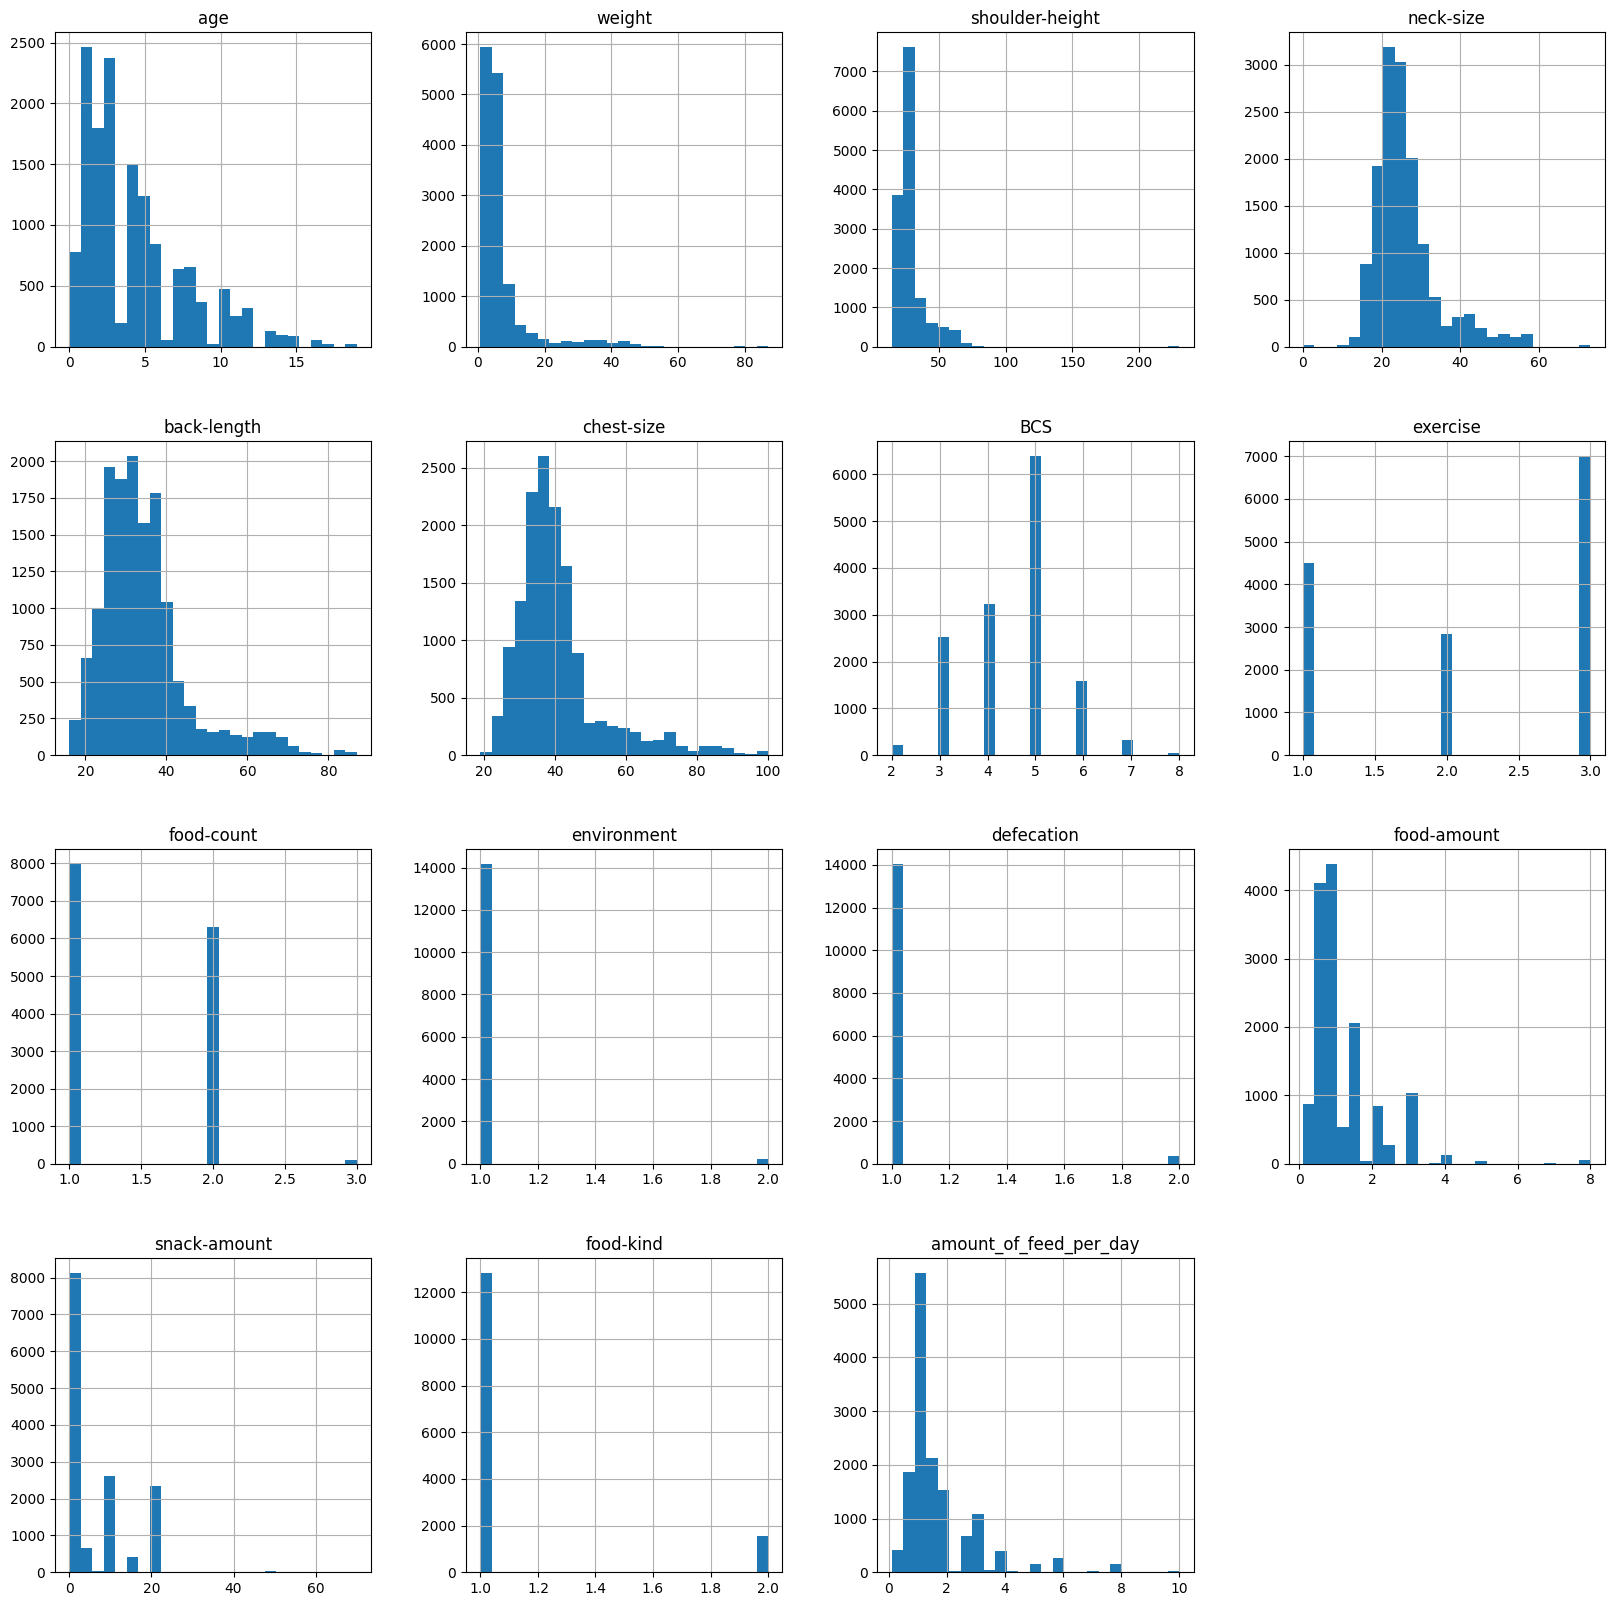

In [ ]:
df.hist(figsize = [20,20], bins = 25)
plt.show()

<ipython-input-51-04fb1f29b091>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


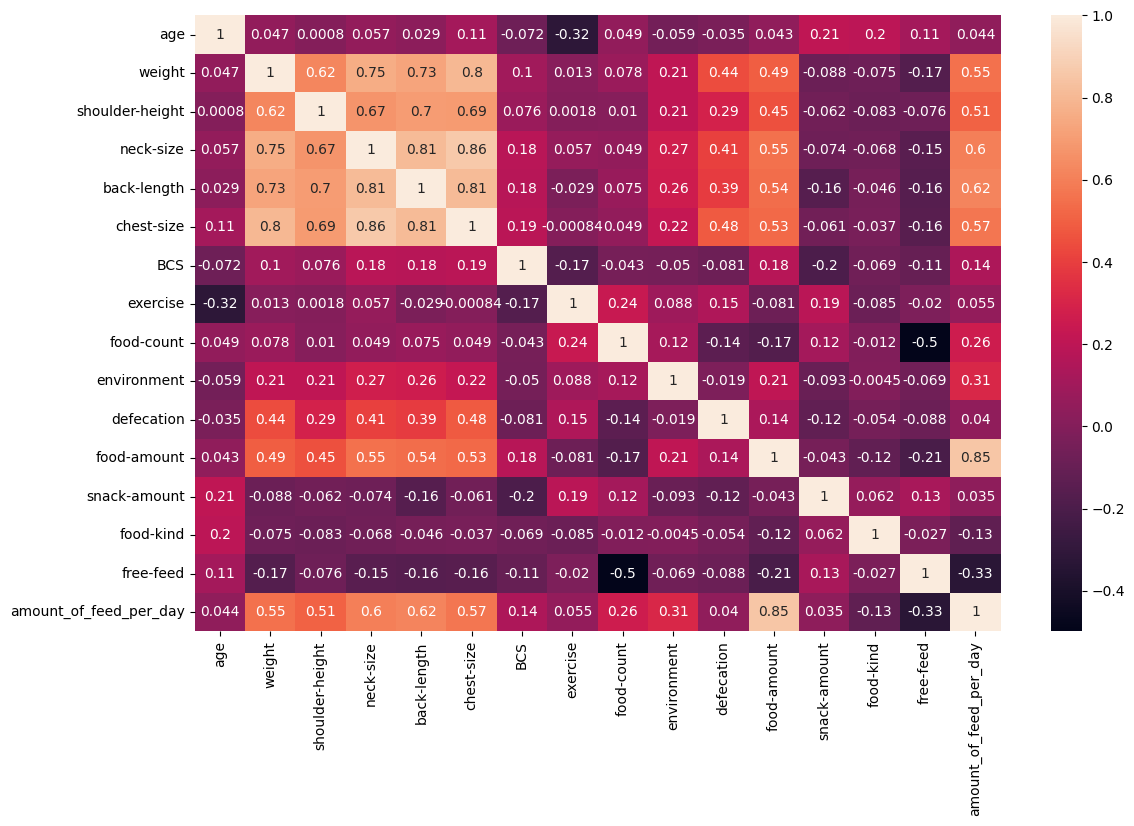

In [ ]:
fig = plt.figure(figsize = (13,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df[df['weight'] > 50]

# 히스토그램을 살펴보니 weight가 80 이상인 데이터가 있어 살펴보았다. 87kg 강아지의 종이 비글인것으로 확인하고 다른 비글 평균 몸무게와 비교해본 후 이상치로 판단하였다.
# 77kg인 강아지의 종을 살펴보니 한 마리 밖에 없는 것으로 확인되어 같이 제거하기로 하였다.

,breed,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind,free-feed,amount_of_feed_per_day
16,BEA,10.0,IM,LS,87.0,32.0,28.0,37.0,45.0,5,1,1,1,1,3.0,0.0,1,False,3.0
70,GRE,6.0,IM,LL,77.0,77.0,56.0,83.0,100.0,6,1,2,1,1,2.0,1.0,1,False,4.0
778,BEA,10.0,IM,LS,87.0,32.0,28.0,37.0,45.0,5,1,1,1,1,3.0,0.0,1,False,3.0
918,BEA,10.0,IM,LS,87.0,32.0,28.0,37.0,45.0,5,1,1,1,1,3.0,0.0,1,False,3.0
1002,GRE,6.0,IM,LL,77.0,77.0,56.0,83.0,100.0,6,1,2,1,1,2.0,1.0,1,False,4.0
1769,GRE,6.0,IM,LL,77.0,77.0,56.0,83.0,100.0,6,1,2,1,1,2.0,1.0,1,False,4.0
2071,BEA,10.0,IM,LS,87.0,32.0,28.0,37.0,45.0,5,1,1,1,1,3.0,0.0,1,False,3.0
2109,BEA,10.0,IM,LS,87.0,32.0,28.0,37.0,45.0,5,1,1,1,1,3.0,0.0,1,False,3.0
2129,BEA,10.0,IM,LS,87.0,32.0,28.0,37.0,45.0,5,1,1,1,1,3.0,0.0,1,False,3.0
2202,BEA,10.0,IM,LS,87.0,32.0,28.0,37.0,45.0,5,1,1,1,1,3.0,0.0,1,False,3.0


In [ ]:
drop_index = df[df['weight'] > 50].index

df = df.drop(drop_index)
df

,breed,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind,free-feed,amount_of_feed_per_day
0,BIC,4.0,IF,SL,3.0,18.0,24.0,24.0,36.0,4,3,1,1,1,1.0,20.0,1,True,1.0
1,BIC,4.0,IM,ML,6.0,30.0,27.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
2,HUS,5.0,IF,LS,32.0,64.0,38.0,48.0,59.0,5,1,2,1,1,2.5,1.0,1,False,5.0
3,JIN,2.0,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,2,1,1,1.0,1.0,1,False,2.0
4,DRI,2.0,IM,SL,3.2,22.0,26.0,30.0,29.0,5,3,2,1,1,1.0,0.0,1,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14355,POO,12.0,IF,SS,3.0,26.0,16.5,21.0,30.5,3,3,1,1,1,1.0,20.0,1,True,1.0
14356,MAL,11.0,CM,SL,3.7,21.5,23.0,24.0,35.0,3,3,2,1,1,0.6,20.0,2,False,1.2
14357,POM,2.0,IF,SL,0.8,19.0,24.5,25.0,35.0,3,3,2,1,1,1.0,0.0,1,False,2.0
14358,POO,5.0,IM,SS,4.0,29.0,24.0,35.0,22.0,3,3,2,1,1,0.8,1.0,1,False,1.6


In [ ]:
df[df['shoulder-height'] > 100]

# sholder-height가 230인 강아지의 종을 살펴보니 비숑이었으며, 다른 비숑 데이터와 비교해보니 확연히 다른 수치로 이상치로 판단하였다.

,breed,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind,free-feed,amount_of_feed_per_day
204,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
1714,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
2539,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
2682,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
2728,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
2945,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
3276,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
5059,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
5266,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
5837,BIC,2.0,IM,ML,5.0,230.0,25.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5


In [ ]:
drop_index = df[df['shoulder-height'] > 100].index

df = df.drop(drop_index)
df

,breed,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind,free-feed,amount_of_feed_per_day
0,BIC,4.0,IF,SL,3.0,18.0,24.0,24.0,36.0,4,3,1,1,1,1.0,20.0,1,True,1.0
1,BIC,4.0,IM,ML,6.0,30.0,27.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
2,HUS,5.0,IF,LS,32.0,64.0,38.0,48.0,59.0,5,1,2,1,1,2.5,1.0,1,False,5.0
3,JIN,2.0,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,2,1,1,1.0,1.0,1,False,2.0
4,DRI,2.0,IM,SL,3.2,22.0,26.0,30.0,29.0,5,3,2,1,1,1.0,0.0,1,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14355,POO,12.0,IF,SS,3.0,26.0,16.5,21.0,30.5,3,3,1,1,1,1.0,20.0,1,True,1.0
14356,MAL,11.0,CM,SL,3.7,21.5,23.0,24.0,35.0,3,3,2,1,1,0.6,20.0,2,False,1.2
14357,POM,2.0,IF,SL,0.8,19.0,24.5,25.0,35.0,3,3,2,1,1,1.0,0.0,1,False,2.0
14358,POO,5.0,IM,SS,4.0,29.0,24.0,35.0,22.0,3,3,2,1,1,0.8,1.0,1,False,1.6


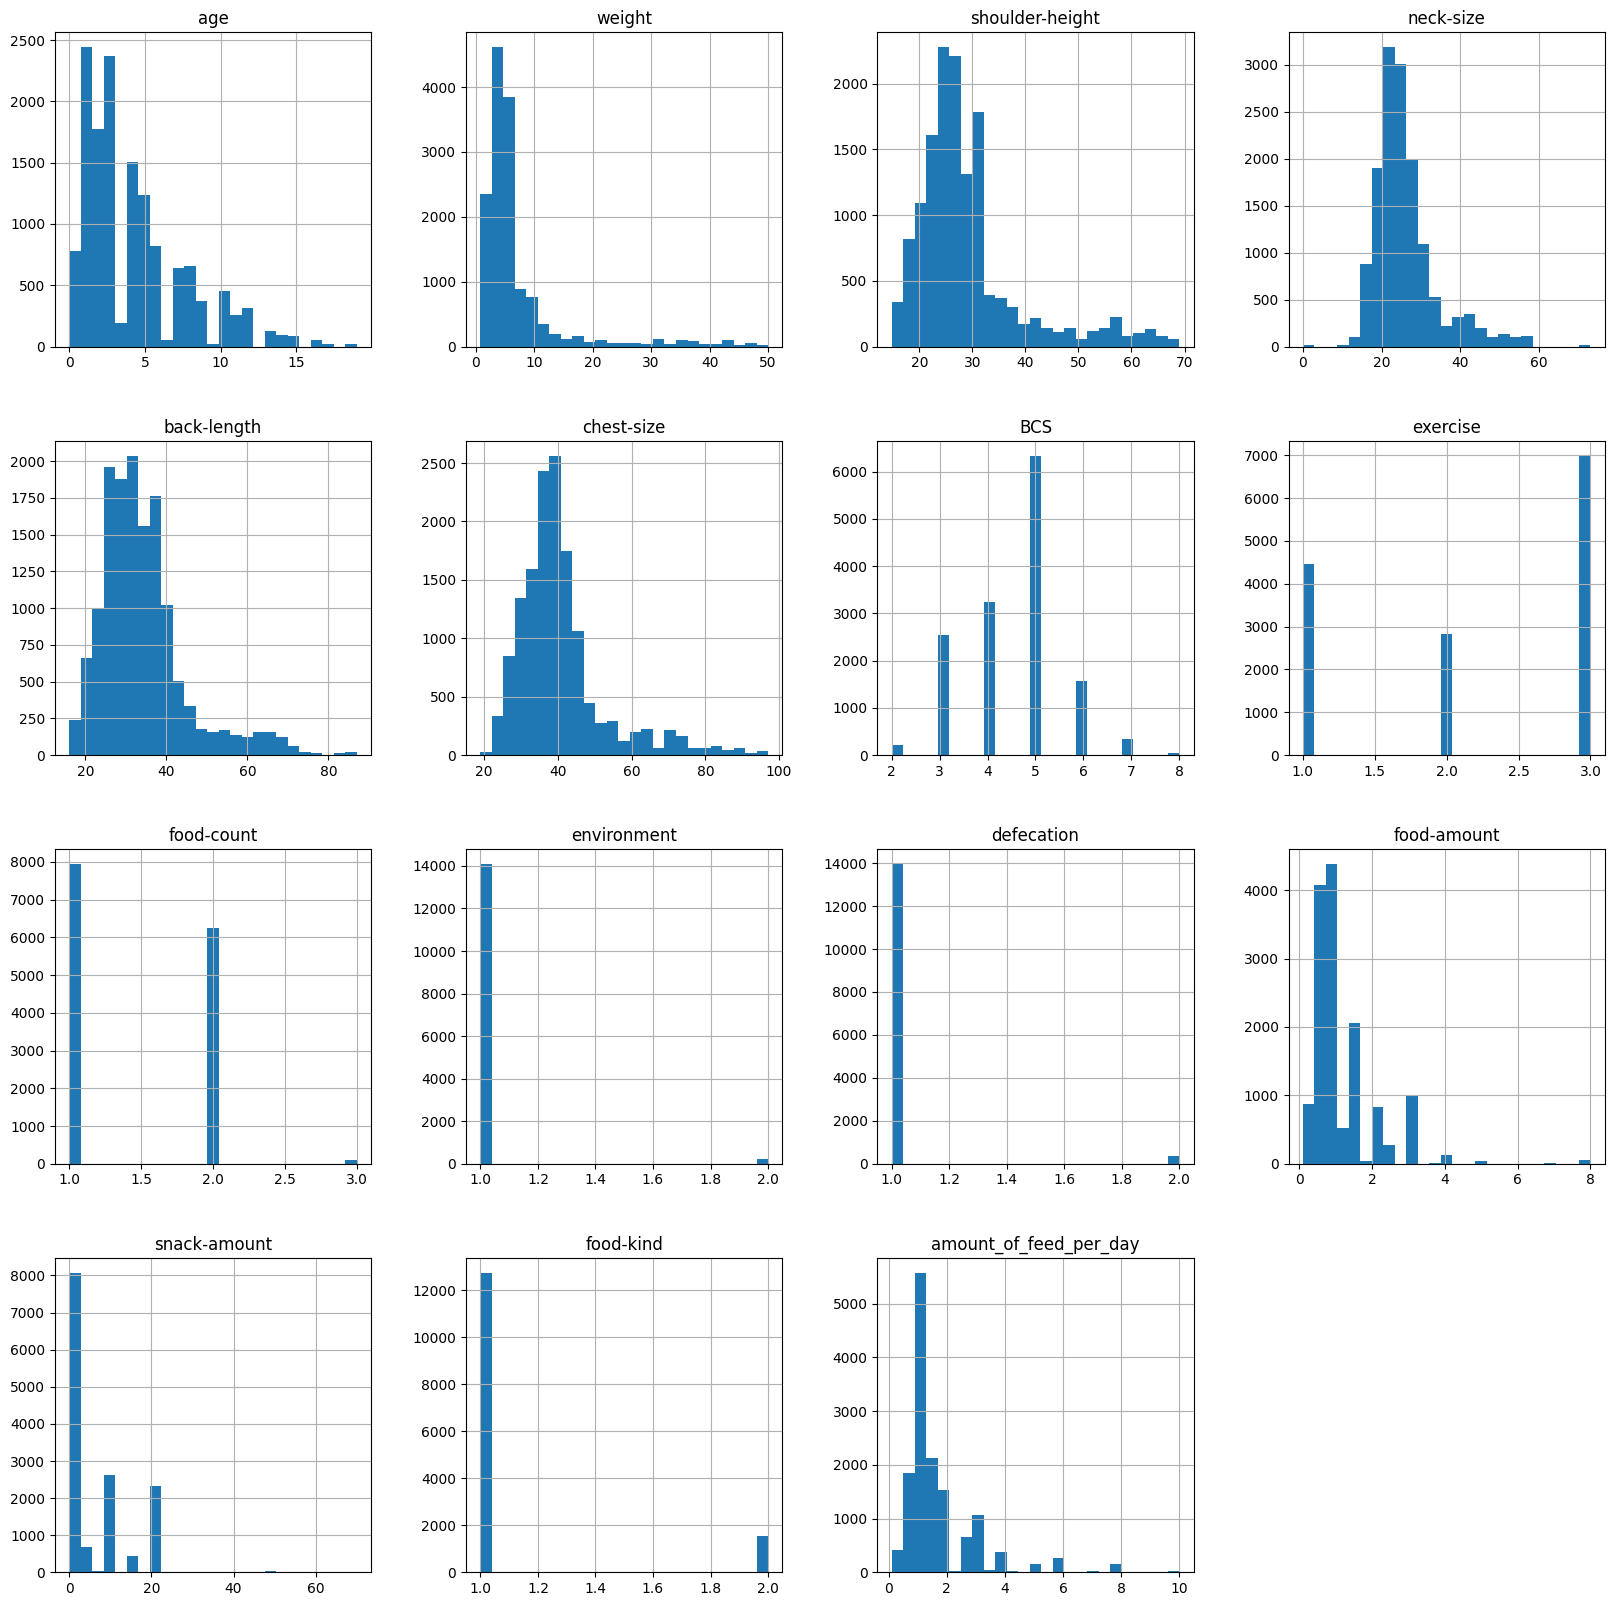

In [ ]:
df.hist(figsize = [20,20], bins = 25)
plt.show()

# 이상치 제거 후 다시 히스토그램 확인

In [ ]:
df = df.drop('breed', axis = 1)
df.head()

# EDA, 이상치 확인 완료 후 breed 제거

,age,sex,group,weight,shoulder-height,neck-size,back-length,chest-size,BCS,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind,free-feed,amount_of_feed_per_day
0,4.0,IF,SL,3.0,18.0,24.0,24.0,36.0,4,3,1,1,1,1.0,20.0,1,True,1.0
1,4.0,IM,ML,6.0,30.0,27.0,40.0,39.0,5,2,1,1,1,0.5,0.0,1,True,0.5
2,5.0,IF,LS,32.0,64.0,38.0,48.0,59.0,5,1,2,1,1,2.5,1.0,1,False,5.0
3,2.0,IF,LS,15.0,47.0,36.0,44.0,55.0,5,1,2,1,1,1.0,1.0,1,False,2.0
4,2.0,IM,SL,3.2,22.0,26.0,30.0,29.0,5,3,2,1,1,1.0,0.0,1,False,2.0


### 데이터 분리

In [ ]:
X = df.drop('BCS', axis = 1)
y = df['BCS']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11424, 17) (2856, 17) (11424,) (2856,)


In [ ]:
y_train.value_counts()

5    5046
4    2614
3    2053
6    1229
7     258
2     184
8      40
Name: BCS, dtype: int64

In [ ]:
y_test.value_counts()

5    1288
4     620
3     480
6     342
7      73
2      41
8      12
Name: BCS, dtype: int64

### label Encoding

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11424 entries, 12937 to 7318
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     11424 non-null  float64
 1   sex                     11424 non-null  object 
 2   group                   11424 non-null  object 
 3   weight                  11424 non-null  float64
 4   shoulder-height         11424 non-null  float64
 5   neck-size               11424 non-null  float64
 6   back-length             11424 non-null  float64
 7   chest-size              11424 non-null  float64
 8   exercise                11424 non-null  int64  
 9   food-count              11424 non-null  int64  
 10  environment             11424 non-null  int64  
 11  defecation              11424 non-null  int64  
 12  food-amount             11424 non-null  float64
 13  snack-amount            11424 non-null  float64
 14  food-kind               11424 non-n

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_attribs = ['sex', 'group', 'exercise', 'food-count', 'environment', 'defecation', 'food-kind', 'free-feed']

for column in cat_attribs:
        X_train[column] = le.fit_transform(X_train[column])
        X_test[column] = le.transform(X_test[column])

#y_train = le.fit_transform(y_train)
#y_test = le.transform(y_test)

In [ ]:
#X_train[cat_attribs] = X_train[cat_attribs].astype('category')
#X_test[cat_attribs] = X_test[cat_attribs].astype('category')

In [ ]:
#y_train = y_train.astype('category')
#y_test = y_test.astype('category')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수를 라벨 인코딩
label_encoder = LabelEncoder()

# 각 열에 대해 범주형 변수를 찾고 라벨 인코딩 수행
for column in df.columns:
    if df[column].dtype == 'object':  # object 타입은 일반적으로 범주형 변수를 나타냅니다.
        df[column] = label_encoder.fit_transform(df[column])

# 변환된 데이터 확인
print(df)

        age  sex  group  weight  shoulder-height  neck-size  back-length  \
0       4.0    1      4     3.0             18.0       24.0         24.0   
1       4.0    2      2     6.0             30.0       27.0         40.0   
2       5.0    1      1    32.0             64.0       38.0         48.0   
3       2.0    1      1    15.0             47.0       36.0         44.0   
4       2.0    2      4     3.2             22.0       26.0         30.0   
...     ...  ...    ...     ...              ...        ...          ...   
14355  12.0    1      5     3.0             26.0       16.5         21.0   
14356  11.0    0      4     3.7             21.5       23.0         24.0   
14357   2.0    1      4     0.8             19.0       24.5         25.0   
14358   5.0    2      5     4.0             29.0       24.0         35.0   
14359   4.0    1      5     3.5             28.0       22.5         24.0   

       chest-size  BCS  exercise  food-count  environment  defecation  \
0            3

## 모델링

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# 성능 지표는 F1 score, 교차 검증 세트는 10개
scores = cross_val_score(rf , X_train , y_train , scoring = 'f1_macro', cv = 10)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.9928 0.9928 0.9903 0.994  0.9856 0.9898 0.9988 0.9843 0.9902 0.9932]
평균 검증 정확도: 0.9912


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 테스트 세트로 예측
y_pred = rf.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9940476190476191

Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.85      0.92        41
           3       0.99      0.99      0.99       480
           4       0.98      0.99      0.99       620
           5       1.00      1.00      1.00      1288
           6       1.00      1.00      1.00       342
           7       1.00      1.00      1.00        73
           8       1.00      1.00      1.00        12

    accuracy                           0.99      2856
   macro avg       1.00      0.98      0.99      2856
weighted avg       0.99      0.99      0.99      2856


Confusion Matrix:
 [[  35    0    6    0    0    0    0]
 [   0  474    6    0    0    0    0]
 [   0    5  615    0    0    0    0]
 [   0    0    0 1288    0    0    0]
 [   0    0    0    0  342    0    0]
 [   0    0    0    0    0   73    0]
 [   0    0    0    0    0    0   12]]


In [ ]:
from sklearn.model_selection import StratifiedKFold

S_kfold = StratifiedKFold(n_splits = 10)

cv_accuracy = []
n_iter = 0

for train_index, test_index in S_kfold.split(X_train, y_train):
    kf_train, kf_test = X_train[train_index], X_train[test_index]
    kf_train, kf_test = y_train[train_index], y_train[test_index]

    rf.fit(kf_train, kf_train)
    pred = rf.predict(kf_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = kf_train.shape[0]
    test_size = kf_test.shape[0]

    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

KeyError: ignored

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_split = 10, shuffle = True, random_state = 42)
checker = skf.get_n_split()
n_iter = 0

for train_index, test_index in skf.split(X_train, y_train):
    n_iter += 1
    label_train = y_train.iloc[train_index]
    label_test = y_train.iloc[test_index]

    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

### XGB

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', importance_type = 'gain', enable_categorical = True)
xgb.fit(X_train, y_train)
xgb.feature_importances_

array([0.03152155, 0.03156004, 0.08174973, 0.03662046, 0.02798066,
       0.02853312, 0.02270426, 0.02419643, 0.06555432, 0.03604065,
       0.08707876, 0.34832814, 0.04441234, 0.05882843, 0.04300819,
       0.03188292], dtype=float32)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9938375350140056


In [ ]:
print(f1_score(y_test, y_pred, average = 'weighted'))

0.9937871880896065


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        57
           1       0.99      0.99      0.99       614
           2       0.98      0.99      0.99       791
           3       1.00      1.00      1.00      1599
           4       1.00      1.00      1.00       405
           5       1.00      1.00      1.00        90
           6       1.00      1.00      1.00        14

    accuracy                           0.99      3570
   macro avg       1.00      0.98      0.99      3570
weighted avg       0.99      0.99      0.99      3570



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[  50    0    7    0    0    0    0]
 [   0  606    8    0    0    0    0]
 [   0    7  784    0    0    0    0]
 [   0    0    0 1599    0    0    0]
 [   0    0    0    0  405    0    0]
 [   0    0    0    0    0   90    0]
 [   0    0    0    0    0    0   14]]


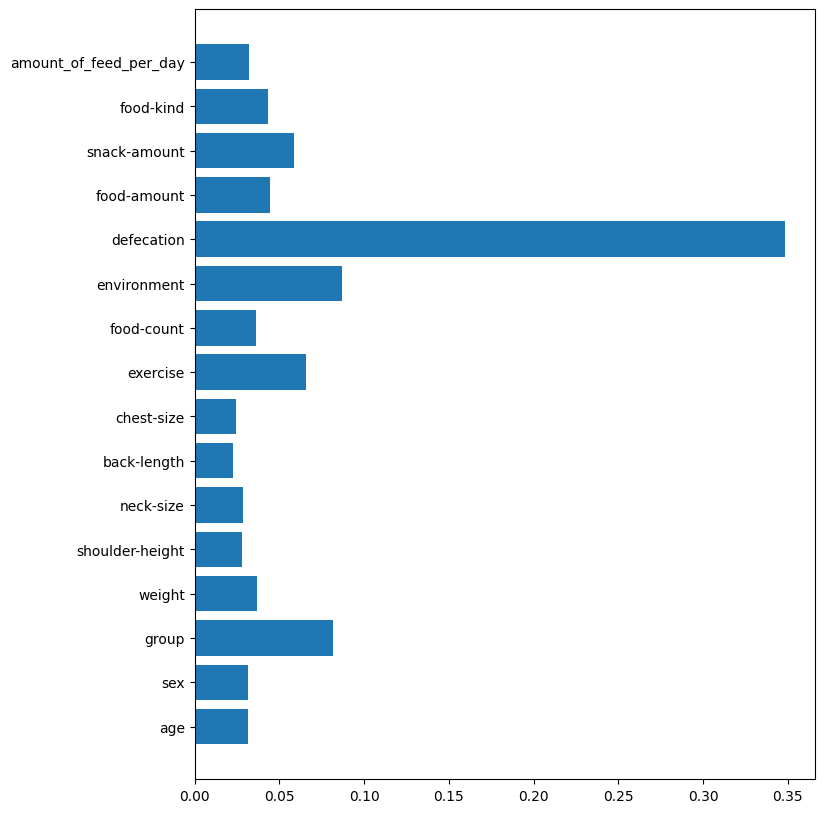

In [ ]:
fig = plt.figure(figsize = (8,10))
plt.barh(X_train.columns, xgb.feature_importances_)
plt.show()

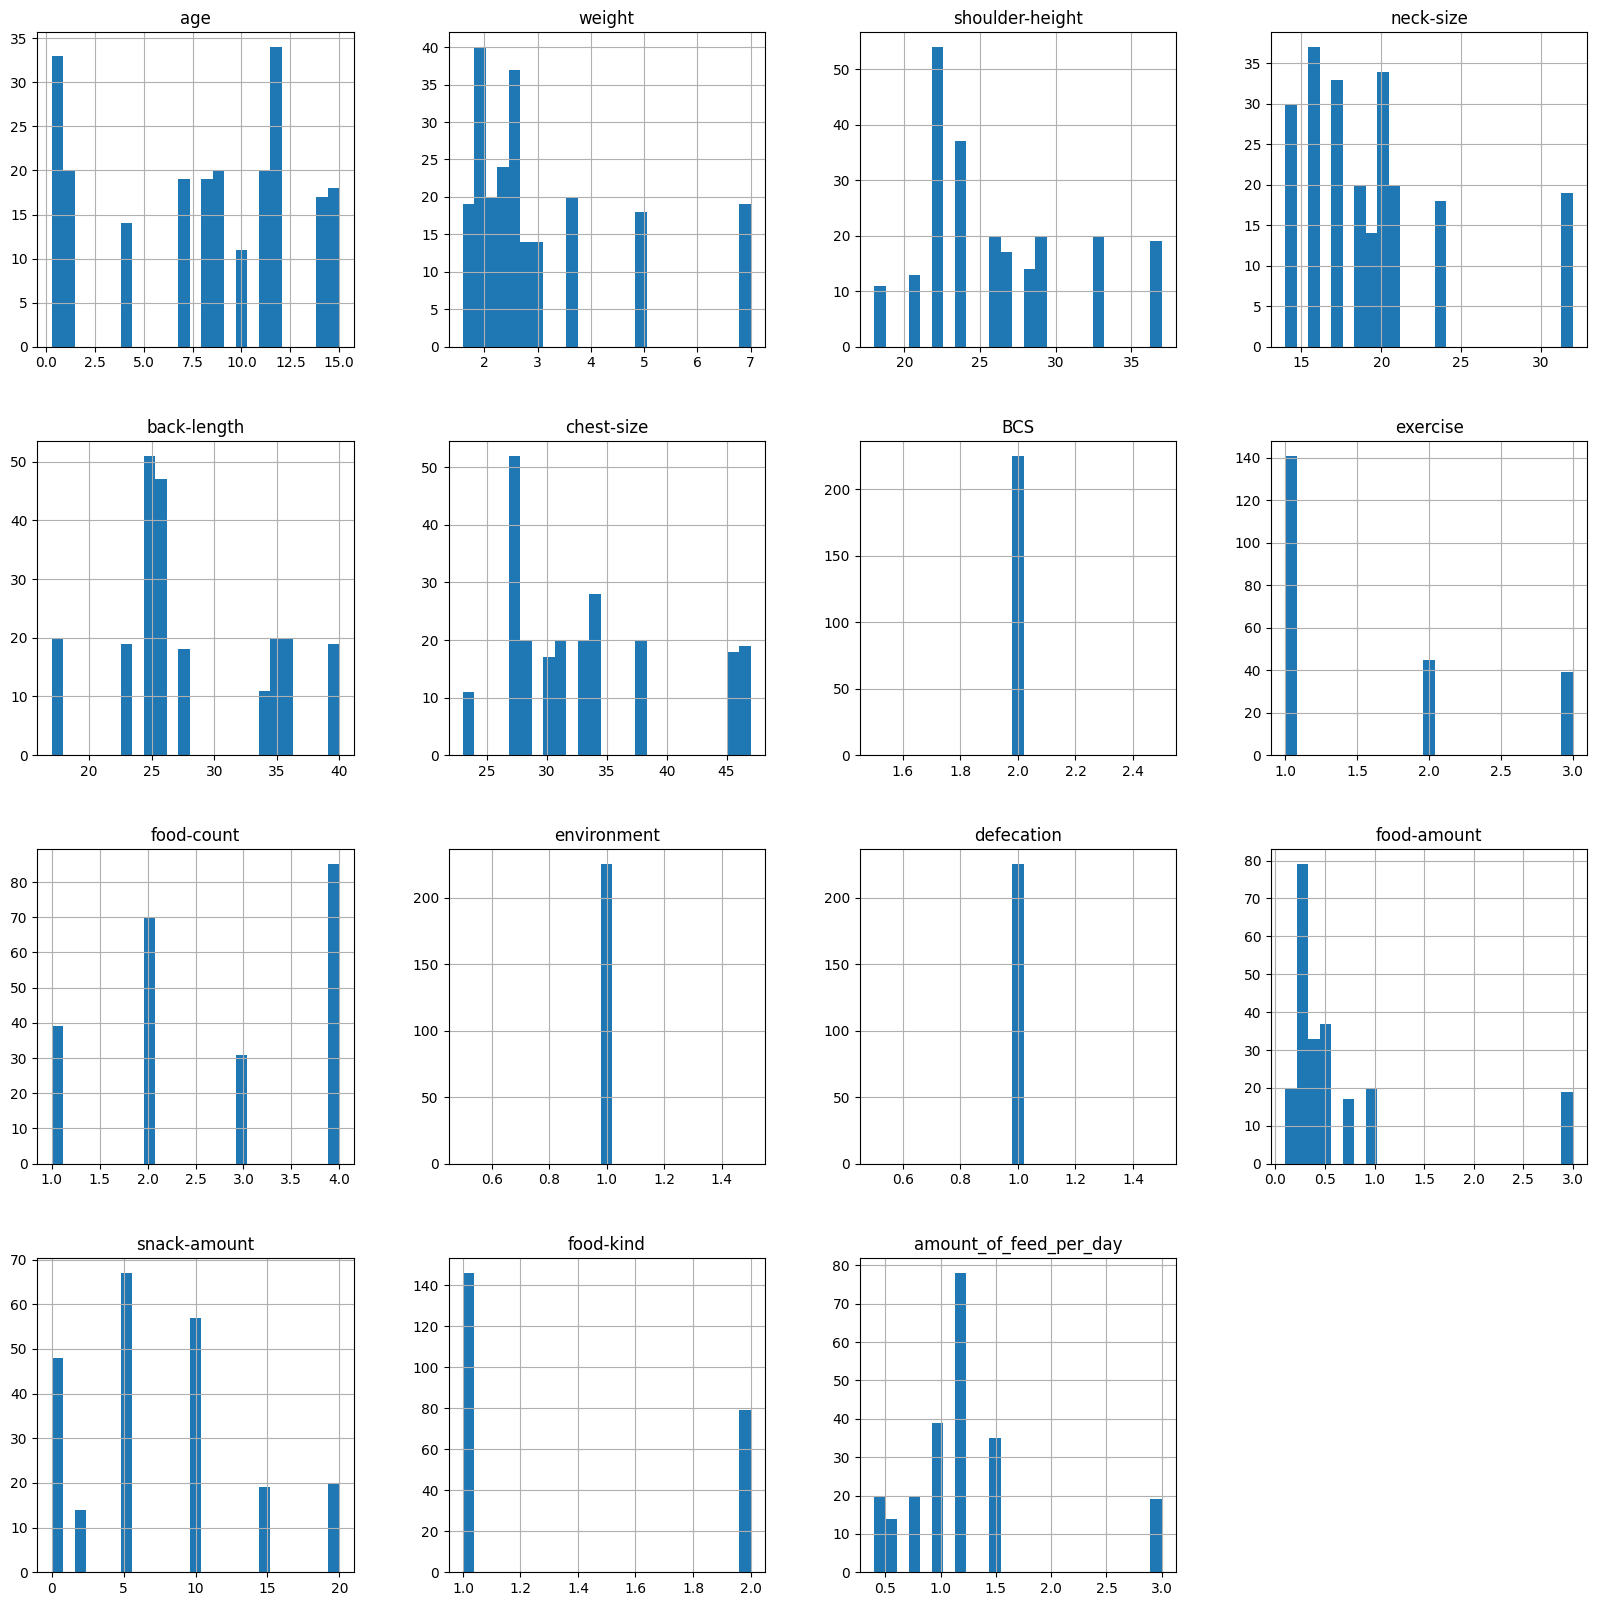

In [ ]:
df[df['BCS'] == 2].hist(figsize = [20,20], bins = 25)
plt.show()

In [ ]:
cat_attribs = ['sex', 'group',
                'exercise', 'environment',
               'defecation', 'food-kind']